# Random Forest- Default_Card_Prediction 

## Data Understanding

In [3]:
# Importing relevant library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# MOdel library
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [4]:
# reading the cvs
data=pd.read_csv("credit-card-default.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')

In [6]:
print("rows:",data.shape[0])
print("columns:",data.shape[1])

rows: 30000
columns: 25


## Data Cleaning


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [8]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

Here we did not find any missing value so we can proceed and build model 

## Data Preparation

In [10]:
# Putting features variable to X
X=data.drop("defaulted",axis=1)

In [11]:
# Putting response variable to y
y=data.defaulted

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

## Model Building

 Default hyperparameters to fit a random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Running the randomforest with defaiult parameter
rfc=RandomForestClassifier()

# fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
# Predictions
predictions=rfc.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88      6982
          1       0.63      0.32      0.43      2018

avg / total       0.78      0.81      0.78      9000



In [27]:
print("accuracy:",accuracy_score(y_test,predictions))

accuracy: 0.8058888888888889


In [30]:
print("Confusion_matrix:")
print(confusion_matrix(y_test,predictions))

Confusion_matrix:
[[6606  376]
 [1371  647]]


to improve model mopdel preformance. now do the hyperparameter tuning

## Hyperparameters to  tune Model 

In [33]:
# to understand about the parameters of RandomForestClassifier 
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, fl

#### Tuning_max_depth 

Let's find the optimal value of ```Max_depth``` and how value of max_depth impacts the overall accuracy of ensemble.

In [42]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify the no. of folds for kfold cv
n_folds=5

# Parameters
parameter={"max_depth":range(2,20,5)}

# Instialise the model

rf=RandomForestClassifier()

# fit tree with training data
rf=GridSearchCV(estimator=rf,param_grid=parameter,cv=n_folds,scoring="accuracy")

rf.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [44]:
# scores of GridSearchCV
cv_results=rf.cv_results_
cv_results=pd.DataFrame(cv_results)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.198162,0.006937,0.007833,0.001597,2,{'max_depth': 2},0.807903,0.816234,0.796905,0.802096,...,0.805095,0.006568,4,0.809810,0.817965,0.798571,0.801798,0.803464,0.806322,0.006877
1,0.478967,0.032592,0.011067,0.002092,7,{'max_depth': 7},0.820281,0.818377,0.819524,0.822815,...,0.819619,0.001926,1,0.830823,0.835407,0.834048,0.833522,0.834057,0.833571,0.001509
2,0.767876,0.060248,0.018019,0.004571,12,{'max_depth': 12},0.821233,0.812902,0.815476,0.811622,...,0.814714,0.003510,2,0.882374,0.878921,0.878929,0.880602,0.878400,0.879845,0.001466
3,0.924814,0.042440,0.019117,0.001901,17,{'max_depth': 17},0.809093,0.812426,0.809286,0.812813,...,0.810714,0.001586,3,0.924996,0.922019,0.925476,0.927921,0.923219,0.924726,0.002022


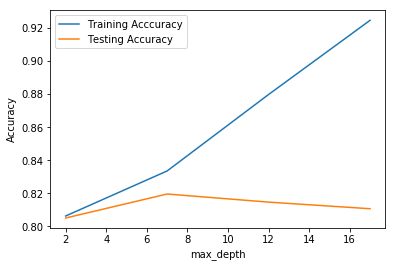

In [46]:
plt.figure()
plt.plot(cv_results.param_max_depth,cv_results.mean_train_score,label="Training Acccuracy")
plt.plot(cv_results.param_max_depth,cv_results.mean_test_score,label="Testing Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

After max_depth of 7 the model starting overfitting.so we will stop it growing after 4. 

#### Tuning n_estimator

Let's find the optimal values for n_estimators and impact the overall accuarcies

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Kfolds
n_folds=5

# Parameters
parameters={"n_estimators":range(100,1500,400)}

# instantiate the model(with max_depth)
rf=RandomForestClassifier(max_depth=4)

# fit the tree
rf=GridSearchCV(estimator=rf,param_grid=parameters,cv=n_folds,scoring="accuracy")

rf.fit(X_train,y_train)




GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
# score of RandomForestClassifier
cv_results=rf.cv_results_
cv_results=pd.DataFrame(cv_results)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.901848,0.023787,0.069804,0.000649,100,{'n_estimators': 100},0.809807,0.814330,0.814524,0.814956,...,0.813238,0.001898,1,0.815227,0.815465,0.814881,0.813225,0.812809,0.814321,0.001089
1,14.901691,0.478765,0.356468,0.027668,500,{'n_estimators': 500},0.807665,0.814568,0.811429,0.813527,...,0.811857,0.002365,4,0.813322,0.814810,0.813452,0.811559,0.813225,0.813274,0.001033
2,27.684366,1.386421,0.644779,0.061926,900,{'n_estimators': 900},0.808141,0.814330,0.811429,0.813765,...,0.811952,0.002180,2,0.813501,0.814156,0.813214,0.811975,0.813761,0.813321,0.000741
3,37.164701,0.111160,0.882153,0.014557,1300,{'n_estimators': 1300},0.808141,0.813616,0.811667,0.814003,...,0.811905,0.002078,3,0.813382,0.813917,0.813214,0.811499,0.813404,0.813083,0.000826


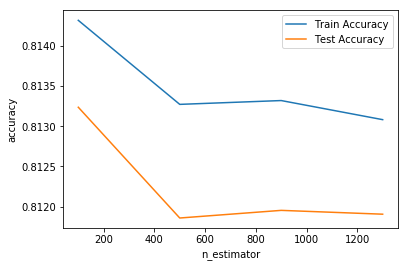

In [57]:
plt.figure()

plt.plot(cv_results.param_n_estimators,cv_results.mean_train_score,label="Train Accuracy")
plt.plot(cv_results.param_n_estimators,cv_results.mean_test_score,label="Test Accuracy")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.legend()
plt.show()

#### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum number of features considered for splitting at a node.

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kfold=5

parameters={"max_features":[4,8,14,18,20,24]}

rf=RandomForestClassifier(max_depth=4)

rf=GridSearchCV(estimator=rf,param_grid=parameters,cv=kfold,scoring="accuracy")

rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 18, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
cv_results=rf.cv_results_
cv_results=pd.DataFrame(cv_results)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.310508,0.008832,0.012089,0.004282,4,{'max_features': 4},0.808379,0.812188,0.810952,0.808050,...,0.810238,0.001701,6,0.813203,0.815465,0.817738,0.807452,0.813821,0.813536,0.003423
1,0.514985,0.003360,0.009912,0.000233,8,{'max_features': 8},0.815520,0.821471,0.818810,0.819719,...,0.818619,0.002004,5,0.819513,0.823620,0.823274,0.818701,0.824475,0.821917,0.002341
2,0.819908,0.015847,0.007853,0.002341,14,{'max_features': 14},0.822185,0.821471,0.818333,0.824244,...,0.820857,0.002360,4,0.824037,0.824871,0.823214,0.823582,0.825427,0.824226,0.000816
3,1.019949,0.014001,0.008901,0.001953,18,{'max_features': 18},0.823137,0.820995,0.818095,0.825196,...,0.821238,0.002658,2,0.824513,0.824156,0.824464,0.823641,0.826260,0.824607,0.000883
4,1.128988,0.006479,0.008881,0.001945,20,{'max_features': 20},0.820757,0.820519,0.819762,0.827816,...,0.821857,0.002997,1,0.824930,0.824871,0.825179,0.824296,0.825844,0.825024,0.000502


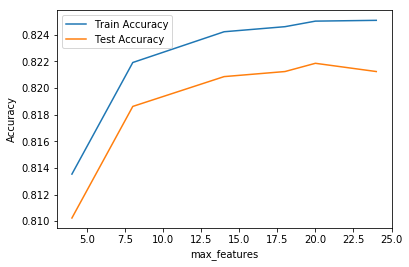

In [60]:
plt.figure()
plt.plot(cv_results.param_max_features,cv_results.mean_train_score,label="Train Accuracy")
plt.plot(cv_results.param_max_features,cv_results.mean_test_score,label="Test Accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

#### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:


In [14]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [15]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.600036,0.045294,0.015707,0.000147,100,{'min_samples_leaf': 100},0.811950,0.819805,0.811905,0.815909,...,0.815143,0.002967,2,0.819454,0.822847,0.815179,0.820130,0.822272,0.819976,0.002714
1,0.513414,0.026510,0.012501,0.006250,150,{'min_samples_leaf': 150},0.819091,0.818615,0.808571,0.822339,...,0.816381,0.004866,1,0.819454,0.818858,0.811548,0.816380,0.815368,0.816322,0.002827
2,0.474990,0.030583,0.012497,0.006248,200,{'min_samples_leaf': 200},0.806713,0.806237,0.810238,0.815432,...,0.810810,0.004019,4,0.807786,0.807727,0.812202,0.812571,0.817392,0.811536,0.003588
3,0.459391,0.021189,0.012492,0.006246,250,{'min_samples_leaf': 250},0.802190,0.813140,0.809048,0.817099,...,0.810381,0.004932,5,0.803084,0.810346,0.810417,0.811975,0.812035,0.809571,0.003324
4,0.418751,0.018226,0.015632,0.000006,300,{'min_samples_leaf': 300},0.806951,0.808855,0.812857,0.815432,...,0.811333,0.003034,3,0.811953,0.808322,0.813810,0.810547,0.813642,0.811655,0.002050


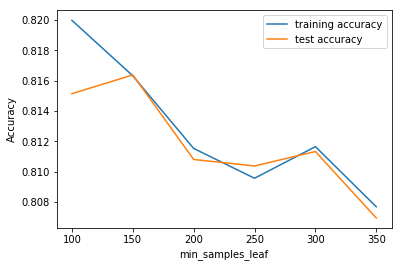

In [16]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 the model starts of overfit as you decrease the value of min_samples_leaf

#### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [17]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, fl

In [18]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.168989,0.342932,0.028650,0.016589,200,{'min_samples_split': 200},0.819567,0.817900,0.821905,0.822101,...,0.819857,0.001861,1,0.825347,0.824573,0.827143,0.825665,0.827272,0.826000,0.001049
1,0.937543,0.151496,0.017576,0.002243,250,{'min_samples_split': 250},0.817662,0.820757,0.817381,0.822101,...,0.819286,0.001840,3,0.824751,0.823740,0.822798,0.822927,0.826558,0.824155,0.001389
2,0.829088,0.103162,0.008734,0.007261,300,{'min_samples_split': 300},0.821471,0.818139,0.819048,0.822577,...,0.818905,0.003231,4,0.824097,0.824097,0.822798,0.821320,0.823106,0.823083,0.001024
3,0.762859,0.060262,0.014286,0.003100,350,{'min_samples_split': 350},0.814092,0.824804,0.819524,0.822101,...,0.819571,0.003709,2,0.819334,0.822251,0.822917,0.822927,0.823225,0.822131,0.001434
4,0.742247,0.054637,0.018755,0.006249,400,{'min_samples_split': 400},0.819329,0.818139,0.817857,0.818290,...,0.818286,0.000551,5,0.820823,0.819751,0.819702,0.817749,0.824594,0.820524,0.002264


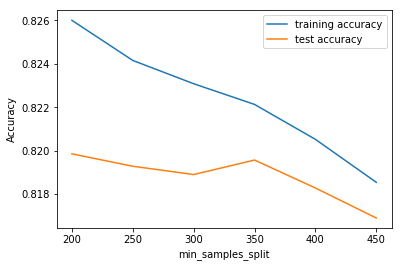

In [20]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [21]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [22]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [23]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8209047619047619 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [25]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
predictions = rfc.predict(X_test)

In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      6982
          1       0.70      0.36      0.48      2018

avg / total       0.81      0.82      0.80      9000



In [28]:
print(confusion_matrix(y_test,predictions))

[[6665  317]
 [1289  729]]


In [29]:
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.8215555555555556
